### MNIST 손글씨 인식

포커스 프로젝트에 온것을 환영합니다^^ <br>
여기에서는 손글씨(숫자)를 인식하는 스크립트를 작성해 봅니다. <br>

#### 학습목표
- 적당한 머신러닝 방법을 적용해 본다.
- 이미지 rotate 방법을 사용하여 학습 데이터를 추가적으로 확보한다.

#### 필요한 패키지를 읽어 옵니다

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, preprocessing
from scipy.ndimage.interpolation import rotate
%matplotlib inline

#### 트레이닝/테스팅 데이터 읽어오기

In [2]:
os.chdir(r"C:\Users\bit\Desktop\20180717_머신러닝 알고리즘과 응용\data")
data_train = pd.read_csv('data_mnist_train_100.csv', header=None,encoding='latin1')
data_test = pd.read_csv('data_mnist_test_100.csv', header=None,encoding='latin1')
X_train = np.array((data_train.iloc[:,1:]/255.0)*0.99+0.01)
X_test = np.array((data_test.iloc[:,1:]/255.0)*0.99+0.01)
Y_train = np.array(data_train.iloc[:,0])
Y_test = np.array(data_test.iloc[:,0])

#### 데이터의 시각화 함수

In [3]:
def show_data(X, Y, n, angle=0):
    image_matrix = X[n,:].reshape((28,28))
    image_matrix = rotate(image_matrix, angle, cval=0.01, reshape=False)
    imax = image_matrix.max()
    imin = image_matrix.min()
    image_matrix = ((image_matrix-imin)/(imax-imin))*0.99+0.01
    plt.imshow(image_matrix, cmap='Greys',interpolation='None')
    print(Y[n])

1


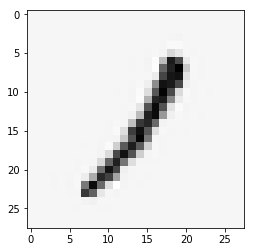

In [14]:
show_data(X_train,Y_train,99,-10)

#### Random Forest 적용 (교차검증 최적화 포함)

In [15]:
estimator_grid = np.arange(20, 51, 10)
depth_grid = np.arange(10, 31, 2)
parameters = {'n_estimators': estimator_grid, 'max_depth': depth_grid}
gridCV = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=10)
gridCV.fit(X_train, Y_train)
best_n_estim = gridCV.best_params_['n_estimators']
best_depth = gridCV.best_params_['max_depth']

C:\Users\bit\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [16]:
print("Random Forest best n estimator : " + str(best_n_estim))
print("Random Forest best depth : " + str(best_depth))

Random Forest best n estimator : 40
Random Forest best depth : 12


In [17]:
RF_best = RandomForestClassifier(max_depth=best_depth,n_estimators=best_n_estim,random_state=3)
RF_best.fit(X_train, Y_train);
Y_pred = RF_best.predict(X_test)
print( "Random Forest best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Random Forest best accuracy : 0.67


#### 이미지 하나 rotate 해주는 함수 정의

In [18]:
def rotate_data(X, angle=0):
    image_matrix = X.reshape((28,28))
    image_matrix = rotate(image_matrix, angle, cval=0.01, reshape=False)
    imax = image_matrix.max()
    imin = image_matrix.min()
    image_matrix = ((image_matrix-imin)/(imax-imin))*0.99+0.01
    return image_matrix.reshape((1,-1))

#### 학습 데이터를 rotation 방법으로 불려줌.

In [19]:
N_rows = X_train.shape[0]
N_cols = X_train.shape[1]
X_train_ext = np.empty((0,N_cols))
Y_train_ext = np.array([])
for angle in [-10,-5,0,5,10]:
    for n in range(N_rows):
        a_row = X_train[n,:]
        a_y = Y_train[n]
        X_train_ext = np.concatenate((X_train_ext,rotate_data(a_row,angle)),axis=0)
        Y_train_ext = np.append(Y_train_ext, a_y)

#### 최종적으로 학습하고 예측함.

In [20]:
RF_best = RandomForestClassifier(max_depth=best_depth,n_estimators=best_n_estim,random_state=3)
RF_best.fit(X_train_ext, Y_train_ext);
Y_pred = RF_best.predict(X_test)
print( "Random Forest best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Random Forest best accuracy : 0.74
